<a href="https://colab.research.google.com/github/bmanobel/deep_learning_course/blob/main/TUTORIAL_05_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00. Connect Colab to Drive

Check where you are!!

Think of the resources you are going need for the task, computation units are limited

**do you need GPUs?**

In [ ]:
# connecting to my google drive
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/TRAINING_AI_SCALIAN_2025/01_DEEP_LEARNING/')

In [ ]:
! ls -lha

total 19M
-rw------- 1 root root 2.7M Dec 20  2023  04_pytorch_custom_datasets.ipynb
drwx------ 2 root root 4.0K Feb  8  2024  best_model
-rw------- 1 root root  34K Feb  8  2024  checkpoint.pt
-rw------- 1 root root 2.3M Apr 18  2024 'Convolutional Autoencoder in Pytorch on MNIST dataset.ipynb'
drwx------ 2 root root 4.0K Jan  7  2024  data
drwx------ 2 root root 4.0K Feb 15  2024  data_fashionmnist
drwx------ 4 root root 4.0K Jan  9  2024  data_mnist
-rw------- 1 root root 109K Mar  4 16:43  day_01_0.ipynb
-rw------- 1 root root 109K Mar  4 16:43  day_01_full.ipynb
-rw------- 1 root root 109K Mar  4 19:05  day_01.ipynb
-rw------- 1 root root 1.9M Jan 29  2024  day_02_full.ipynb
-rw------- 1 root root 212K Mar  5 18:52  day_02.ipynb
-rw------- 1 root root 1.2M Feb  2  2024  day_03_full.ipynb
-rw------- 1 root root 755K Mar 11 19:01  day_03.ipynb
-rw------- 1 root root 372K Mar 16 19:01  day_04.ipynb
-rw------- 1 root root 448K Feb  6  2024  day_04_original.ipynb
-rw------- 1 root root

# 01. MNIST database


Today we are solving a classic problem, MNIST stands for Modified NIST (National Institute of Standards and Technology).

The creators of MNIST decided to take samples from the original NIST to create an extended and fairer version, since the origin of the training data did not match that of the test data in NIST: In the first case, they came from numbers written by employees of the American Census Bureau, while in the second of high school students.

It is a collection of 70000 handwritten digits split into training and test set of 60000 and 10000 images respectively.

Almost all deep learning problems use this database to show how the problem is solved.

The data set is originally available on Yann Lecun’s website. Cleaning the data is one of the biggest tasks. Don’t forget — “Garbage in, garbage out !”. Luckily, for us PyTorch provides an easy implementation to download the cleaned and already prepared data, using a few lines of code. Before starting, we need to make all the necessary imports.

<div align="center">
<img src="https://raw.githubusercontent.com/bmanobel/deep_learning_course/main/PNGS/number_two_pytorch.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>

# 02. Multiclass classification

A [multiclass classification problem](https://en.wikipedia.org/wiki/Multiclass_classification) involves classifying instances into three or more classes, in this case, we are predicting between ten classes.

We need to consider two changes regarding the binary classification problem, loss function and last layer activation (we can use logits and choose the largest one, but using a softmax layer we get the final result as probabilities, wich is more informative)







## What we're going to cover

Same process we perform last class




| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture of a classification neural network** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Use dataset and dataloaders classes** | Get data ready using these useful classes, introduce batch size as another hyperparameter |
| **2. Building a PyTorch classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. |
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. See what convolutional layers are like ** | See how Conv2D and pooling layers work |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | Analyze hyperparameter combination to get the best model |



## Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.



# Setup device agnostic-code (for using a GPU if there is one)

> **Note:** Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) for our models and data to run on GPU if it's available.

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Make classification data and get it ready

Let us import main packages and download data from torchvision.datasets

In [ ]:
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd
import matplotlib.pyplot as plt # plotting library
import random
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split, RandomSampler, SubsetRandomSampler
from torch import nn
import torch.nn.functional as F # another way of building net class
import torch.optim as optim


In [ ]:
# import EarlyStopping
from pytorchtools import EarlyStopping # np.Inf --> np.inf

In [ ]:
! pwd

/content/drive/My Drive/TRAINING_AI_SCALIAN_2025/01_DEEP_LEARNING


In [ ]:
! ls -lha ./data_mnist/

total 8.0K
drwx------ 2 root root 4.0K Jan  9  2024 FashionMNIST
drwx------ 3 root root 4.0K Jan  9  2024 MNIST


Before downloading the data, let us define what are the transformations we want to perform on our data before feeding it into the pipeline. In other words, you can consider it to be some kind of custom edit to are performing to the images so that all the images have the same dimensions and properties. We do it using torchvision.transforms.

1. transforms.ToTensor() — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.

2. transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5), (0.5)),
                              ])

In [ ]:
! ls -lha

total 19M
-rw------- 1 root root 2.7M Dec 20  2023  04_pytorch_custom_datasets.ipynb
drwx------ 2 root root 4.0K Feb  8  2024  best_model
-rw------- 1 root root  34K Feb  8  2024  checkpoint.pt
-rw------- 1 root root 2.3M Apr 18  2024 'Convolutional Autoencoder in Pytorch on MNIST dataset.ipynb'
drwx------ 2 root root 4.0K Jan  7  2024  data
drwx------ 2 root root 4.0K Feb 15  2024  data_fashionmnist
drwx------ 4 root root 4.0K Jan  9  2024  data_mnist
-rw------- 1 root root 109K Mar  4 16:43  day_01_0.ipynb
-rw------- 1 root root 109K Mar  4 16:43  day_01_full.ipynb
-rw------- 1 root root 109K Mar  4 19:05  day_01.ipynb
-rw------- 1 root root 1.9M Jan 29  2024  day_02_full.ipynb
-rw------- 1 root root 212K Mar  5 18:52  day_02.ipynb
-rw------- 1 root root 1.2M Feb  2  2024  day_03_full.ipynb
-rw------- 1 root root 755K Mar 11 19:01  day_03.ipynb
-rw------- 1 root root 372K Mar 16 19:01  day_04.ipynb
-rw------- 1 root root 448K Feb  6  2024  day_04_original.ipynb
-rw------- 1 root root

In [ ]:
data_dir = 'data_mnist'

In [ ]:
train_data = torchvision.datasets.MNIST(data_dir, train=True, download=True, transform= transform )
test_data  = torchvision.datasets.MNIST(data_dir, train=False, download=True, transform= transform)

m = len(train_data)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data_mnist
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data_mnist
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

## Pick sample of 10% so training time won't be long

In [ ]:
train_data_sample = RandomSampler(train_data, num_samples=6000)
test_data_sample = RandomSampler(test_data, num_samples = 1000)

In [ ]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
train_data[0][1]

5

In [ ]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [ ]:
type(image), type(label)

(torch.Tensor, int)

In [ ]:
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.


Various problems will have various input and output shapes. But the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.

If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known a the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

For now, since our dataset and models are relatively small, this won't make too much of a difference.


Let's check out more shapes of our data.

In [ ]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets), len(train_data_sample), len(test_data_sample)

(60000, 60000, 10000, 10000, 6000, 1000)

In [ ]:
# see classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image shape: torch.Size([1, 28, 28])



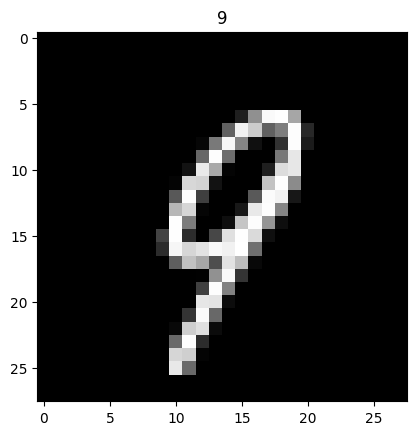

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[22]
print(f"Image shape: {image.shape}\n")
plt.imshow(image.squeeze(), cmap= 'gray') # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

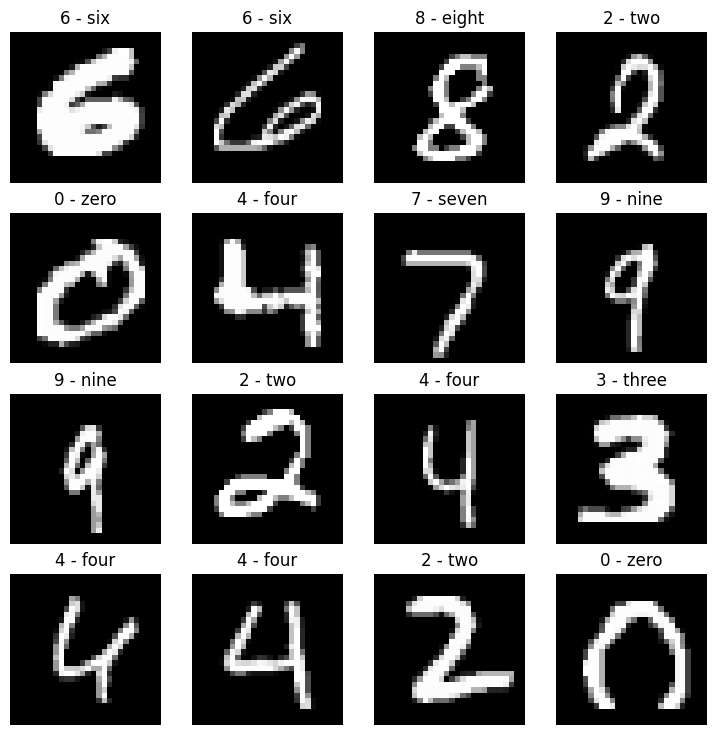

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9)) # figure size
rows, cols = 4, 4                 # n_rows, n_cols
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 2. Prepare DataLoader



The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` helps load data into a model for training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), **gradient descent is performed more often per epoch** (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).



Let's create `DataLoader`'s for our training and test sets.

In [ ]:
# check how many batches you have using 8, 16

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 16  # test and train batch size don't have to be the same, actually, it´s better to have a greater test batch size, inference will be faster
BATCH_SIZE_TEST = 128 # RAM is your limit
# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=False, # shuffle data every epoch
    sampler = train_data_sample
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE_TEST,
    shuffle=False, # don't necessarily have to shuffle the testing data
    sampler = test_data_sample
)



In [ ]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f7f43810510>, <torch.utils.data.dataloader.DataLoader object at 0x7f7f438119d0>)
Length of train dataloader: 375 batches of 16
Length of test dataloader: 8 batches of 16


In [ ]:
6e3 / 16

375.0

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


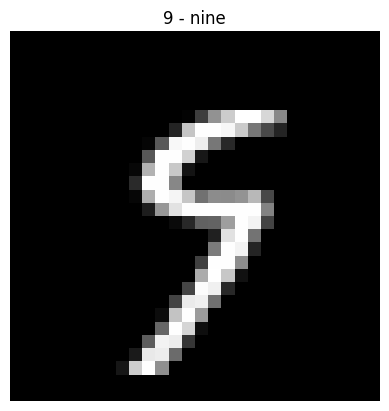

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Building a Convolutional Neural Network (CNN)

Alright, time to step things up a notch.

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

Let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).



To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


In [ ]:
# Create a convolutional neural network
class MNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1,   # default
                      padding=1),  # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.Mish(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.Mish(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.Mish(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.Mish(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x



In [ ]:
torch.manual_seed(42)
model_0 = MNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_0

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Mish()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Mish()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Mish()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Mish()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Stepping through `nn.Conv2d()`

We could start using our model above and see what happens but let's first step through the two new layers we've added:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a convolutional layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a max pooling layer.

> **Question:** What does the "2d" in `nn.Conv2d()` stand for?
>
> The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.
>
> For other dimensional data (such as 1D for text or 3D for 3D objects) there's also `nn.Conv1d()` and `nn.Conv3d()`.

To test the layers out, let's create some toy data just like the data used on CNN Explainer.

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(16, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([16, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [ ]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [ ]:
conv_layer(test_image).shape

torch.Size([10, 62, 62])

If we try to pass a single image in, we get a shape mismatch error:

> `RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead`
>
> **Note:** If you're running PyTorch 1.11.0+, this error won't occur.

This is because our `nn.Conv2d()` layer expects a 4-dimensional tensor as input with size `(N, C, H, W)` or `[batch_size, color_channels, height, width]`.

Right now our single image `test_image` only has a shape of `[color_channels, height, width]` or `[3, 64, 64]`.

We can fix this for a single image using `test_image.unsqueeze(dim=0)` to add an extra dimension for `N`.

In [ ]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [ ]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])


Now our image is of shape `[1, 10, 30, 30]` (it will be different if you use different values) or `[batch_size=1, color_channels=10, height=30, width=30]`.

What's going on here?

Behind the scenes, our `nn.Conv2d()` is compressing the information stored in the image.

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is *how* the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer `forward()` method.

If we check out our `conv_layer_2.state_dict()` we'll find a similar weight and bias setup as we've seen before.

In [ ]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [ ]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


> **Question:** What should we set the parameters of our `nn.Conv2d()` layers?
>
> That's a good one. But similar to many other things in machine learning, the values of these aren't set in stone (and recall, because these values are ones we can set ourselves, they're referred to as "**hyperparameters**").
>
> The best way to find out is to try out different values and see how they effect your model's performance.
>
> Or even better, find a working example on a problem similar to yours (like we've done with TinyVGG) and copy it.

We're working with a different of layer here to what we've seen before.

But the premise remains the same: start with random numbers and update them to better represent the data.

### Stepping through `nn.MaxPool2d()`
Now let's check out what happens when we move data through `nn.MaxPool2d()`.

In [ ]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Notice the change in the shapes of what's happening in and out of a `nn.MaxPool2d()` layer.

The `kernel_size` of the `nn.MaxPool2d()` layer will effects the size of the output shape.

In our case, the shape halves from a `62x62` image to `31x31` image.

Let's see this work with a smaller tensor.

In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Notice the final two dimensions between `random_tensor` and `max_pool_tensor`, they go from `[2, 2]` to `[1, 1]`.

In essence, they get halved.

And the change would be different for different values of `kernel_size` for `nn.MaxPool2d()`.

Also notice the value leftover in `max_pool_tensor` is the **maximum** value from `random_tensor`.

What's happening here?

This is another important piece of the puzzle of neural networks.

Essentially, **every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space**.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being *smaller* in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to *compress* information.

![each layer of a neural network compresses the original input data into a smaller representation that is (hopefully) capable of making predictions on future input data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

This means, that from the point of view of a neural network, intelligence is compression.

This is the idea of the use of a `nn.MaxPool2d()` layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

It is the same story for a `nn.Conv2d()` layer.

Except instead of just taking the maximum, the `nn.Conv2d()` performs a convolutional operation on the data (see this in action on the [CNN Explainer webpage](https://poloclub.github.io/cnn-explainer/)).



In [ ]:
# https://stackoverflow.com/questions/49201236/check-the-total-number-of-parameters-in-a-pytorch-model

from prettytable import PrettyTable
def count_parameters(model):
    table = PrettyTable(['Modules', 'Parameters'])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f'Total Trainable Params: {total_params}')
    return total_params

In [ ]:
count_parameters(model_0)

+---------------------+------------+
|       Modules       | Parameters |
+---------------------+------------+
|   block_1.0.weight  |     90     |
|    block_1.0.bias   |     10     |
|   block_1.2.weight  |    900     |
|    block_1.2.bias   |     10     |
|   block_2.0.weight  |    900     |
|    block_2.0.bias   |     10     |
|   block_2.2.weight  |    900     |
|    block_2.2.bias   |     10     |
| classifier.1.weight |    4900    |
|  classifier.1.bias  |     10     |
+---------------------+------------+
Total Trainable Params: 7740


7740

In [ ]:
model_0.state_dict().keys()

odict_keys(['block_1.0.weight', 'block_1.0.bias', 'block_1.2.weight', 'block_1.2.bias', 'block_2.0.weight', 'block_2.0.bias', 'block_2.2.weight', 'block_2.2.bias', 'classifier.1.weight', 'classifier.1.bias'])

In [ ]:
model_0.state_dict()['classifier.1.bias']

tensor([ 0.0320, -0.0445,  0.0246, -0.0357, -0.0442,  0.0156, -0.0010, -0.0277,
         0.0404,  0.0037], device='cuda:0')

In [ ]:
# Import accuracy metric
from sklearn.metrics import accuracy_score

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
#optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001, weight_decay = 0.01, amsgrad = True) # https://wiki.cloudfactory.com/docs/mp-wiki/solvers-optimizers/adam/amsgrad-variant-adam

In [ ]:
for param_group in optimizer.param_groups:
    print(param_group['lr'])

0.001


In [ ]:
optimizer.param_groups[0]['lr']

0.001

In [ ]:
patience = 5

In [ ]:
early_stopping = (patience=patience, path = './best_model/cnn_mish_checkpoint.pt', verbose=True)EarlyStopping

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 50

# Define the learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer,  # optimizer I chose
                              mode='min', # depends on what I looking at (in this case is val_loss, I want it to be as smaller as possible)
                              factor=0.8, # multiplying lr
                              patience=3) # when val_loss does not improve in # patience steps

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss, train_acc = 0, 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        # 0 .Send data to target device
        X,y = X.to(device), y.to(device)
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_data_sample)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    train_acc += accuracy_score(y_true=y.cpu(), y_pred=y_pred.detach().cpu().argmax(dim=1))



    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    val_loss, val_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 0. Send data to target device
            X,y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            val_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            val_acc += accuracy_score(y_true=y.cpu(), y_pred=test_pred.detach().cpu().argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        val_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        val_acc /= len(test_dataloader)

    scheduler.step(val_acc)
    early_stopping(val_acc, model_0)

    if early_stopping.early_stop:
        print("Early stopping")
        break
    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Val loss: {val_loss:.5f}, Train acc: {train_acc:.5f} | Val acc: {val_acc:.5f} | Learning rate: {optimizer.param_groups[0]['lr']} \n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/6000 samples
Validation loss decreased (inf --> 0.918570).  Saving model ...

Train loss: 0.70380 | Val loss: 0.26831, Train acc: 0.93750 | Val acc: 0.91857 | Learning rate: 0.001 

Epoch: 1
-------
Looked at 0/6000 samples
EarlyStopping counter: 1 out of 5

Train loss: 0.20941 | Val loss: 0.19491, Train acc: 0.93750 | Val acc: 0.94066 | Learning rate: 0.001 

Epoch: 2
-------
Looked at 0/6000 samples
EarlyStopping counter: 2 out of 5

Train loss: 0.16998 | Val loss: 0.09629, Train acc: 0.93750 | Val acc: 0.96905 | Learning rate: 0.001 

Epoch: 3
-------
Looked at 0/6000 samples
EarlyStopping counter: 3 out of 5

Train loss: 0.14725 | Val loss: 0.13469, Train acc: 0.93750 | Val acc: 0.95252 | Learning rate: 0.001 

Epoch: 4
-------
Looked at 0/6000 samples
EarlyStopping counter: 4 out of 5

Train loss: 0.13219 | Val loss: 0.10194, Train acc: 1.00000 | Val acc: 0.97438 | Learning rate: 0.001 

Epoch: 5
-------
Looked at 0/6000 samples
EarlyStopping counter: 

In [ ]:
aa

NameError: name 'aa' is not defined

In [ ]:
# check best model

In [ ]:




model_best = MNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)




In [ ]:
model_best.load_state_dict(torch.load('./best_model/cnn_checkpoint.pt'))

<All keys matched successfully>

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               ):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_score(y_true=y.cpu(),
                                y_pred=y_pred.detach().cpu().argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}



In [ ]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_best, data_loader=test_dataloader,
    loss_fn=loss_fn
)
model_0_results

{'model_name': 'MNISTModelV2',
 'model_loss': 0.14534005522727966,
 'model_acc': 0.9598106971153846}

## 4. Functionizing training and test loops

We'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.
(Consider different batch size for training and inference)

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,

               device: torch.device = device):
    train_loss, train_acc = 0, 0

    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_score(y_true=y.cpu(),
                                 y_pred=y_pred.detach().cpu().argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.4f}%")
    return train_loss.detach().cpu(), train_acc


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,

              device: torch.device = device):
    val_loss, val_acc = 0, 0

    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            val_loss += loss_fn(test_pred, y)
            val_acc += accuracy_score(y_true=y.cpu(),
                y_pred=test_pred.detach().cpu().argmax(dim=1) # Go from logits -> pred labels
            )


        # Adjust metrics and print out
        val_loss /= len(data_loader)
        val_acc /= len(data_loader)
        print(f"Val loss: {val_loss:.5f} | Val accuracy: {val_acc:.4f}%\n")
        scheduler.step(val_loss)

        return val_loss.detach().cpu(), val_acc

## Starting problem again

We need to instantiate model, scheduler and optimizer

In [ ]:
torch.manual_seed(42)

model_0 = MNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)



In [ ]:
#model_0.load_state_dict(torch.load('./best_model/cnn_checkpoint.pt'))

<All keys matched successfully>

In [ ]:
torch.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
# start problem without using regularization
# improve it as much as you can and consider other hyperparameters so you can check the effect of each one
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.0001, weight_decay = 0.01, amsgrad = True) # https://wiki.cloudfactory.com/docs/mp-wiki/solvers-optimizers/adam/amsgrad-variant-adam

early_stopping = EarlyStopping(patience=5, # steps to stop training if does not improve
                               path = './best_model/cnn_checkpoint.pt',
                               verbose=True)
scheduler = ReduceLROnPlateau(optimizer,  # optimizer I chose
                              mode='min', # depends on what I looking at (in this case is val_loss, I want it to be as smaller as possible)
                              factor=0.1, # multiplying lr
                              patience=2) # when val_loss does not improve in # patience steps

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
train_loss_list, train_acc_list = [], []
val_loss_list, val_acc_list = [], []
epochs = 50
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_loss, train_acc = train_step(data_loader=train_dataloader,
        model=model_0,
        loss_fn=loss_fn,
        optimizer=optimizer,

    )
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    val_loss, val_acc = test_step(data_loader=test_dataloader,
        model=model_0,
        loss_fn=loss_fn,

    )
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)
    #scheduler.step(val_loss)
    early_stopping(val_loss, model_0)
    print(f"\nlearning rate: {optimizer.param_groups[0]['lr']}\n")
    if early_stopping.early_stop:
        print("Early stopping")
        break


train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.15400 | Train accuracy: 0.9538%
Val loss: 0.12663 | Val accuracy: 0.9613%

Validation loss decreased (inf --> 0.126634).  Saving model ...

learning rate: 0.0001

Epoch: 1
---------
Train loss: 0.14560 | Train accuracy: 0.9572%
Val loss: 0.13310 | Val accuracy: 0.9611%

EarlyStopping counter: 1 out of 5

learning rate: 0.0001

Epoch: 2
---------
Train loss: 0.14747 | Train accuracy: 0.9563%
Val loss: 0.12302 | Val accuracy: 0.9621%

Validation loss decreased (0.126634 --> 0.123017).  Saving model ...

learning rate: 0.0001

Epoch: 3
---------
Train loss: 0.13431 | Train accuracy: 0.9612%
Val loss: 0.12344 | Val accuracy: 0.9618%

EarlyStopping counter: 1 out of 5

learning rate: 0.0001

Epoch: 4
---------
Train loss: 0.13333 | Train accuracy: 0.9585%
Val loss: 0.11756 | Val accuracy: 0.9645%

Validation loss decreased (0.123017 --> 0.117565).  Saving model ...

learning rate: 0.0001

Epoch: 5
---------
Train loss: 0.13517 | Train accuracy: 0.9608%
Val l

In [ ]:

model_best = MNISTModelV2(input_shape=1,
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_best.to(device) # model to GPU

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Mish()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Mish()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Mish()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Mish()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_best.load_state_dict(torch.load('./best_model/cnn_checkpoint.pt'))

<All keys matched successfully>

We can now evaluate our model

In [ ]:
# Calculate model 0 results on test dataset
model_best_results = eval_model(model=model_best, data_loader=test_dataloader,
    loss_fn=loss_fn
)
model_best_results

{'model_name': 'MNISTModelV2',
 'model_loss': 0.13280166685581207,
 'model_acc': 0.9663461538461539}

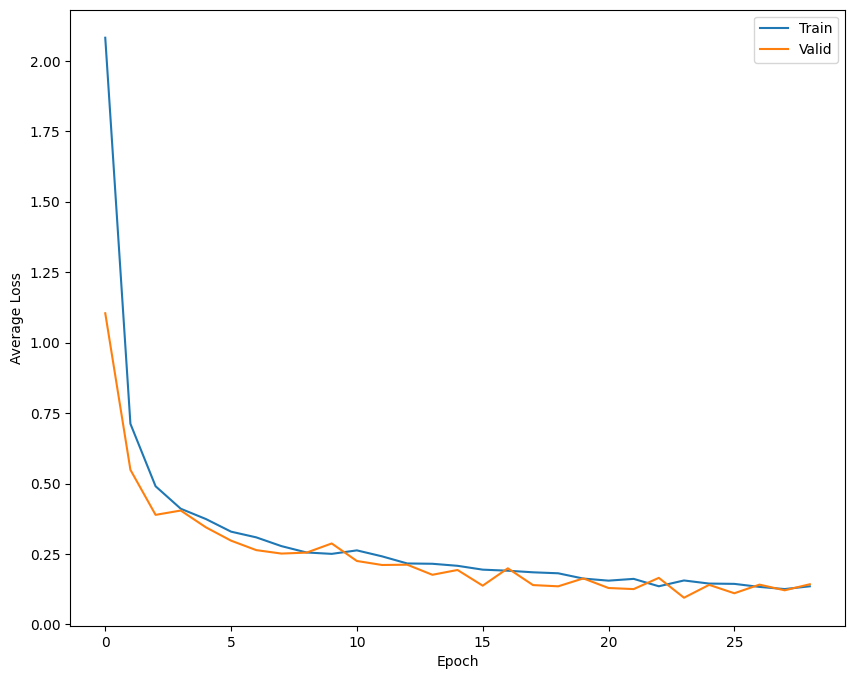

In [ ]:
# Plot losses
plt.figure(figsize=(10,8))
plt.plot(train_loss_list, label='Train')
plt.plot(val_loss_list, label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
#plt.grid()
plt.legend()
#plt.title('loss')
plt.show()

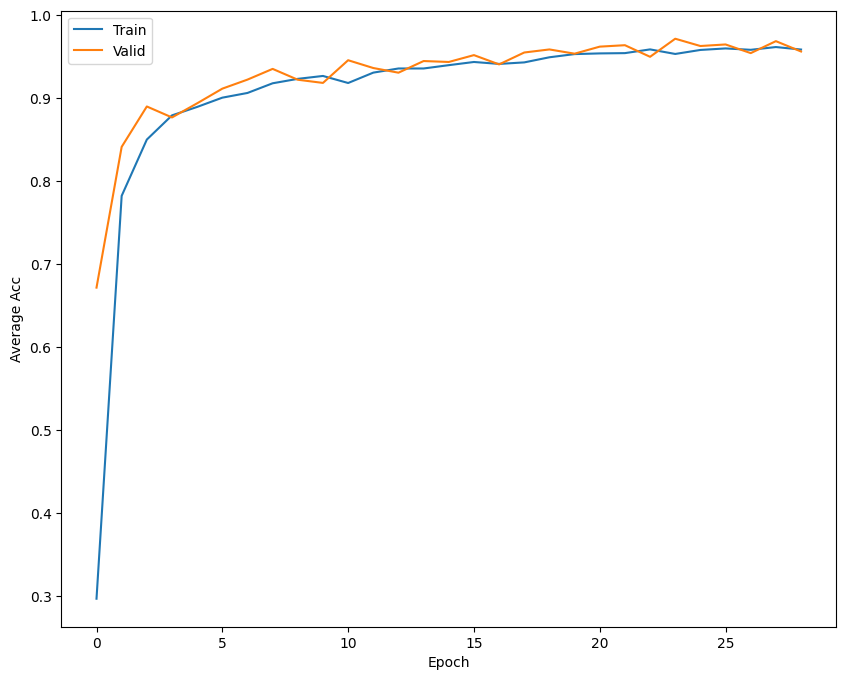

In [ ]:
# Plot accuracy
plt.figure(figsize=(10,8))
plt.plot(train_acc_list, label='Train')
plt.plot(val_acc_list, label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Average Acc')
#plt.grid()
plt.legend()
#plt.title('loss')
plt.show()

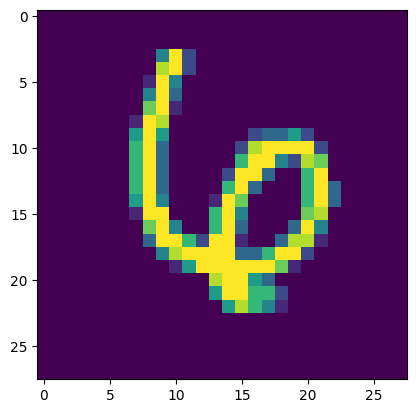

In [ ]:
plt.imshow(test_data[22][0].squeeze())

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_0,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[9.6391e-07, 7.0061e-05, 9.9912e-01, 1.0436e-04, 5.9277e-10, 6.5437e-08,
         5.4866e-09, 2.4993e-07, 7.0530e-04, 5.8062e-07],
        [6.3538e-07, 9.9438e-01, 8.9626e-05, 1.9830e-04, 1.1655e-03, 3.4612e-04,
         2.5649e-04, 9.9139e-05, 3.3005e-03, 1.6042e-04]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([2, 1, 2, 4, 6, 6, 4, 9, 1], tensor([2, 1, 2, 4, 6, 6, 4, 9, 1]))

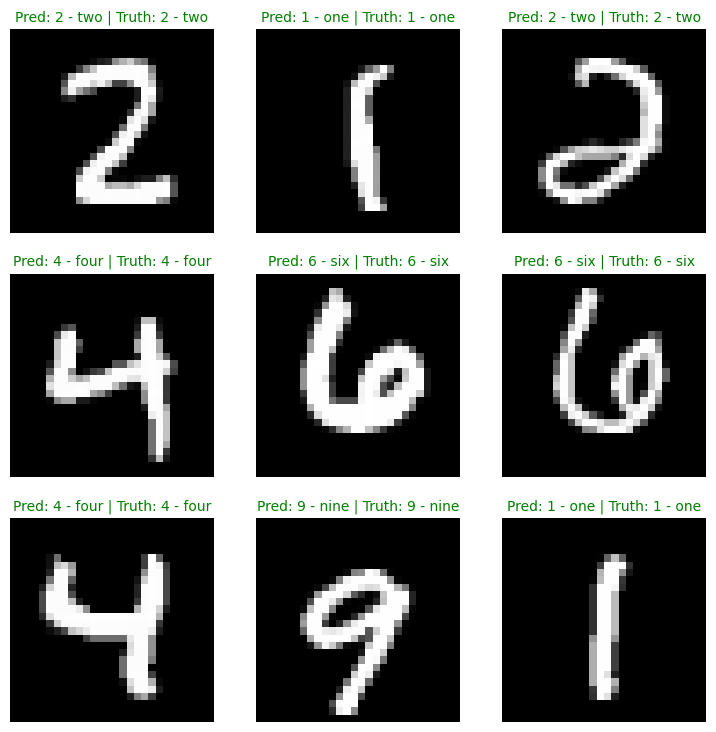

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [ ]:
test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE_TEST,
    shuffle=False, # don't necessarily have to shuffle the testing data

)

In [ ]:
y = [j for i,j in iter(test_dataloader)]
len(y)

79

In [ ]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
y_true = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_0(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
    y_true.append(y)
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_true_tensor = torch.cat(y_true)

Making predictions:   0%|          | 0/79 [00:00<?, ?it/s]

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
y_pred_tensor

tensor([7, 2, 1,  ..., 4, 5, 6])

In [ ]:
y_true = [i.cpu() for i in y_true]
y_true = torch.cat(y_true)

In [ ]:
y_true

tensor([7, 2, 1,  ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.8 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


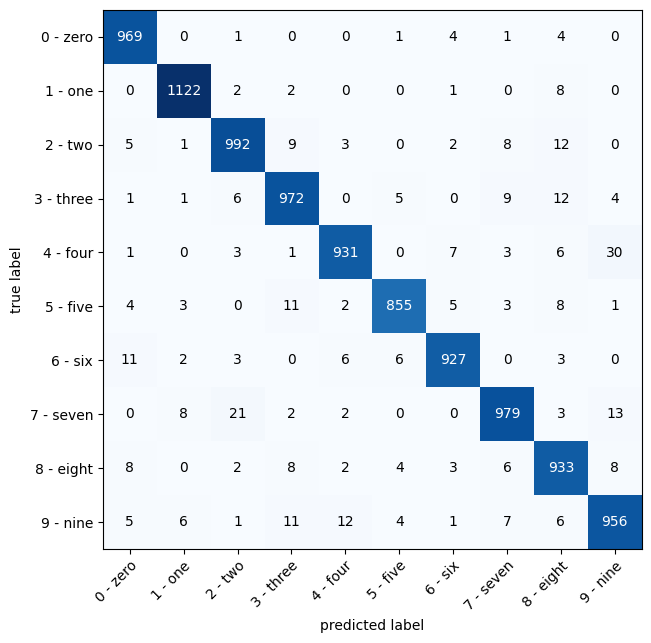

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [ ]:
test_data.targets.shape, y_pred_tensor.shape

(torch.Size([10000]), torch.Size([10000]))

In [ ]:
accuracy_score(y_pred_tensor, test_data.targets)

0.9636

In [ ]:
test_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
cm = confusion_matrix(y_true = y_true, y_pred= y_pred_tensor)#, labels = test_data.classes)
cm

array([[ 969,    0,    1,    0,    0,    1,    4,    1,    4,    0],
       [   0, 1122,    2,    2,    0,    0,    1,    0,    8,    0],
       [   5,    1,  992,    9,    3,    0,    2,    8,   12,    0],
       [   1,    1,    6,  972,    0,    5,    0,    9,   12,    4],
       [   1,    0,    3,    1,  931,    0,    7,    3,    6,   30],
       [   4,    3,    0,   11,    2,  855,    5,    3,    8,    1],
       [  11,    2,    3,    0,    6,    6,  927,    0,    3,    0],
       [   0,    8,   21,    2,    2,    0,    0,  979,    3,   13],
       [   8,    0,    2,    8,    2,    4,    3,    6,  933,    8],
       [   5,    6,    1,   11,   12,    4,    1,    7,    6,  956]])

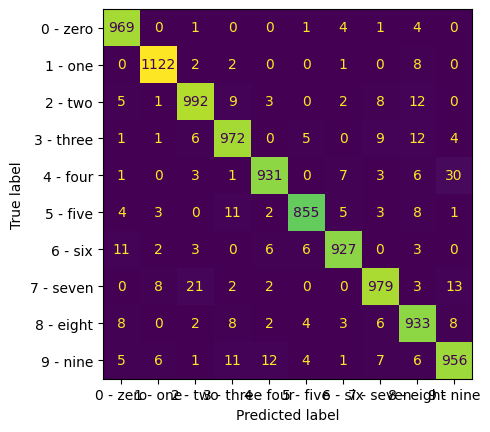

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= test_data.classes)
disp.plot(colorbar = False);

In [ ]:
# now improve the model

## 5. Improving a model (from a model perspective)

Let's try to fix our model's underfitting problem.

Focusing specifically on the model (not the data), there are a few ways we could do this.

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Add regularizationn** | Model will perform better if weights are regularized, try to use dropout layers |


> **Note:** *because you can adjust all of these by hand, they're referred to as **hyperparameters**.
>


Let's see what happens if we add an extra layer to our model, fit for longer (`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.

We'll follow the same steps we did above but with a few changed hyperparameters.

In [ ]:
aa

NameError: name 'aa' is not defined